# Lorenz Equations

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [2]:
# %matplotlib notebook


## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy .integrate.odeint` to compute the solution.

In [43]:
def lorenz(x,t):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        x ((3,) ndarray): The state values (x,y,z)
        t (float): The time value t
    Returns:
        ((3,) ndarray): The derivative values
    """
    sig = 10
    rho = 28
    beta = 8/3
    
    
    return np.array([ sig*(x[1]-x[0]),
                      rho*x[0] - x[1] - x[0]*x[2],
                      x[0]*x[1] - beta*x[2]

                    ])

# Also, a handy function for generating random initial conditions
get_initial_conditions = lambda : np.random.random((3))*30 - 15
    
# Define a good time domain to use in odeint
t_domain = np.linspace(0,30,2000)  

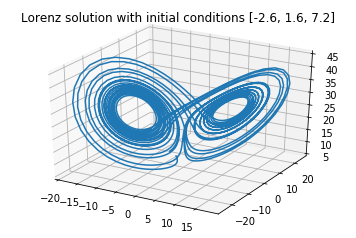

In [44]:
# Plot a random 3D initial condition from Uniform[-15,15]


# Get initial conditions
initial_conditions = get_initial_conditions()

# Calculate solution
solution = odeint(lorenz,initial_conditions,t_domain)

# Set up 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data in 3D
ax.plot(solution[:,0],solution[:,1],solution[:,2])

title = "Lorenz solution with initial conditions [{:.1f}, {:.1f}, {:.1f}]".format(*initial_conditions)
ax.set_title(title)
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

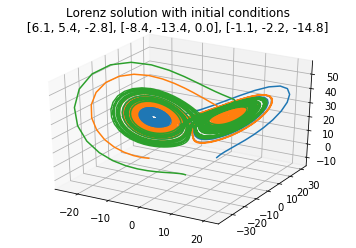

In [45]:
# Get 3 initial conditions
intl_cond = [get_initial_conditions() for _ in range(3)]

# Find solutions for each condition
sols = [odeint(lorenz, ic, t_domain) for ic in intl_cond]

# Set up 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each solution
for sol in sols:
    ax.plot(sol[:,0],sol[:,1],sol[:,2])

ax.set_title("Lorenz solution with initial conditions\n [{:.1f}, {:.1f}, {:.1f}], [{:.1f}, {:.1f}, {:.1f}], [{:.1f}, {:.1f}, {:.1f}] ".format(*intl_cond[0],*intl_cond[1],*intl_cond[2]))
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [54]:
# Start with two very similar initial conditions
init_cond_1 = get_initial_conditions()
init_cond_2 = init_cond_1 + np.random.randn(3)*(1e-10)

# Solve each along the same time domain
sol_1 = odeint(lorenz, init_cond_1, t_domain)
sol_2 = odeint(lorenz, init_cond_2, t_domain)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(0,50)

p1, = plt.plot([],[],[],'r')
p2, = plt.plot([],[],[],'b')

# Define what gets plotted each frame
def frame(i):
    p1.set_data(sol_1[:i,0],sol_1[:i,1])
    p1.set_3d_properties(sol_1[:i,2])
    
    p2.set_data(sol_2[:i,0],sol_2[:i,1])
    p2.set_3d_properties(sol_2[:i,2])

    
# create the Animation object
lorenz_anim_1 = FuncAnimation(fig, frame, frames=len(t_domain))
lorenz_anim_1.save('lorenz_animation1.mp4', fps = 60)
plt.clf()


<Figure size 432x288 with 0 Axes>

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `odeint` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the odeint arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [52]:
# Start with an initial condition
init_cond_1 = get_initial_conditions()

# Solve with different atol and rtol
sol_1 = odeint(lorenz, init_cond_1, t_domain, atol=1e-15, rtol=1e-13)
sol_2 = odeint(lorenz, init_cond_1, t_domain, atol=1e-12, rtol=1e-10)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_zlim(0,50)

p1, = plt.plot([],[],[],'r')
p2, = plt.plot([],[],[],'b')

# Define what gets plotted each frame
def frame(i):
    p1.set_data(sol_1[:i,0],sol_1[:i,1])
    p1.set_3d_properties(sol_1[:i,2])
    
    p2.set_data(sol_2[:i,0],sol_2[:i,1])
    p2.set_3d_properties(sol_2[:i,2])
    return p1

    
# create the Animation object
lorenz_anim_2 = FuncAnimation(fig, frame,frames=len(t_domain))
lorenz_anim_2.save('lorenz_animation2.mp4', fps = 60)
plt.clf()

<Figure size 432x288 with 0 Axes>

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `odeint` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

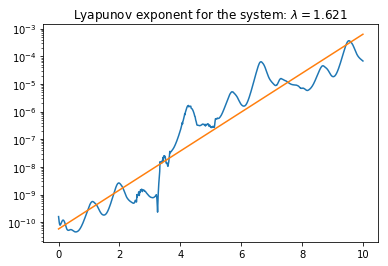

In [38]:
# Now we use a smaller time domain
t_domain_2 = np.linspace(0,10,1000)

# Start with very similar initial conditions
init_cond_1 = get_initial_conditions()
init_cond_2 = init_cond_1 + np.random.randn(3)*(1e-10)

# Solve for both
sol_1 = odeint(lorenz, init_cond_1, t_domain_2)
sol_2 = odeint(lorenz, init_cond_2, t_domain_2)

# Calculate the difference at each time step
differences = np.linalg.norm(sol_1 - sol_2, axis=1)

# Find the line of best fit
l = linregress(t_domain_2,np.log(differences))
slope = l.slope
intercept = l.intercept

# Plot the result
plt.title("Lyapunov exponent for the system: $\lambda = {:.3f}$".format(slope))
plt.semilogy(t_domain_2,differences)
plt.semilogy(t_domain_2,np.exp(slope*t_domain+intercept))
plt.show()